In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import datetime
from matplotlib import pyplot as plt
import time
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/dataset/type3"
 
# to store files in a list
image1 = cv2.imread('/content/drive/MyDrive/dataset/type3/3.jpg')
image2 = cv2.imread('/content/drive/MyDrive/dataset/type3/5.jpg')
image3 = cv2.imread('/content/drive/MyDrive/dataset/type3/11.jpg')
image=[image1,image2,image3]
# dirs=directories
reshaped=[0,0,0]
for i in range(0,len(image)):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [ ]:
numClusters=3

In [ ]:
clustering=[]
for i in range(0,len(image)):
    clustering.append(0)
for i in range(0,len(image)):
    kmeans = KMeans(n_clusters=numClusters, n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [ ]:
sortedLabels=[[],[],[]]
for i in range(0,len(image)):
    sortedLabels[i] = sorted([n for n in range(numClusters)],
        key=lambda x: -np.sum(clustering[i] == x))

In [ ]:
kmeansImage=[0,0,0]
concatImage=[[],[],[]]
for j in range(0,len(image)):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0], int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j], cv2.COLOR_GRAY2BGR)), axis=1)

AxesImage(54,36;334.8x217.44)


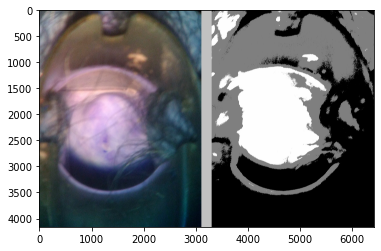

In [ ]:
print(plt.imshow(concatImage[0]))

AxesImage(54,36;334.8x217.44)


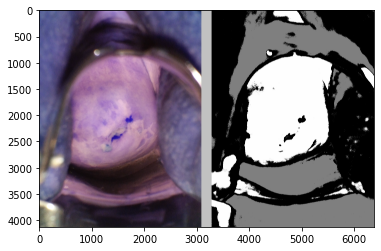

In [ ]:
print(plt.imshow(concatImage[1]))

AxesImage(54,36;334.8x217.44)


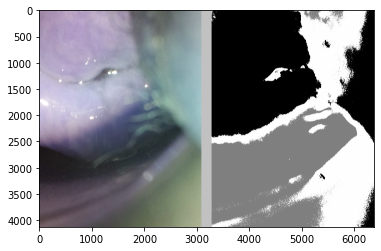

In [ ]:
print(plt.imshow(concatImage[2]))